In [1]:
from typing_extensions import TypedDict
from typing import Literal

class State(TypedDict):
    name: str
    game: Literal["cricket","badminton"]

In [6]:
def play_game(state:State):
    print("---Play Game node has been called--")
    return {
        "name": state["name"] + " wants to play"
    }

def cricket(state: State):
    print("-- Cricket node has been called--")
    return {
        "name": state["name"] + " cricket",
        "game": "cricket"
    }

def badminton(state: State):
    print("-- badminton node has been called--")
    return {
        "name": state["name"] + " badminton",
        "game": "badminton"
    }

In [7]:
import random
def decide_play(state: State)-> Literal["cricket","badminton"]:
    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"
    

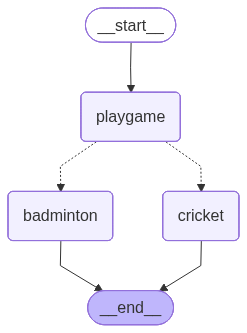

In [23]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("playgame",play_game)
builder.add_node("cricket",cricket)
builder.add_node("badminton",badminton)

builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("badminton",END)


graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


In [22]:
graph.invoke({
    "name": "Smaari"
})

TypeError: DataClassState.__init__() missing 1 required positional argument: 'game'

In [15]:
from dataclasses import dataclass

@dataclass
class DataClassState:
    name: str
    game: Literal["badminton", "cricket"]
    

In [16]:
def play_game(state:DataClassState):
    print("---Play Game node has been called--")
    return {
        "name": state.name + " wants to play"
    }

def cricket(state: DataClassState):
    print("-- Cricket node has been called--")
    return {
        "name": state.name + " cricket",
        "game": "cricket"
    }

def badminton(state: DataClassState):
    print("-- badminton node has been called--")
    return {
        "name": state.name + " badminton",
        "game": "badminton"
    }

In [17]:
import random
def decide_play(state: DataClassState)-> Literal["cricket","badminton"]:
    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"

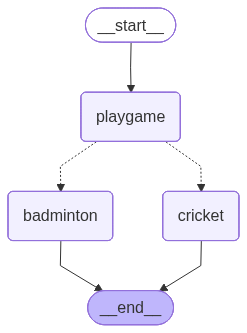

In [24]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder = StateGraph(DataClassState)
builder.add_node("playgame",play_game)
builder.add_node("cricket",cricket)
builder.add_node("badminton",badminton)

builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("badminton",END)


graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


In [30]:
graph.invoke(DataClassState(name="krish",game="cricket"))

---Play Game node has been called--
-- badminton node has been called--


{'name': 'krish wants to play badminton', 'game': 'badminton'}